# **WEEK 8 - HOMEWORK 2**

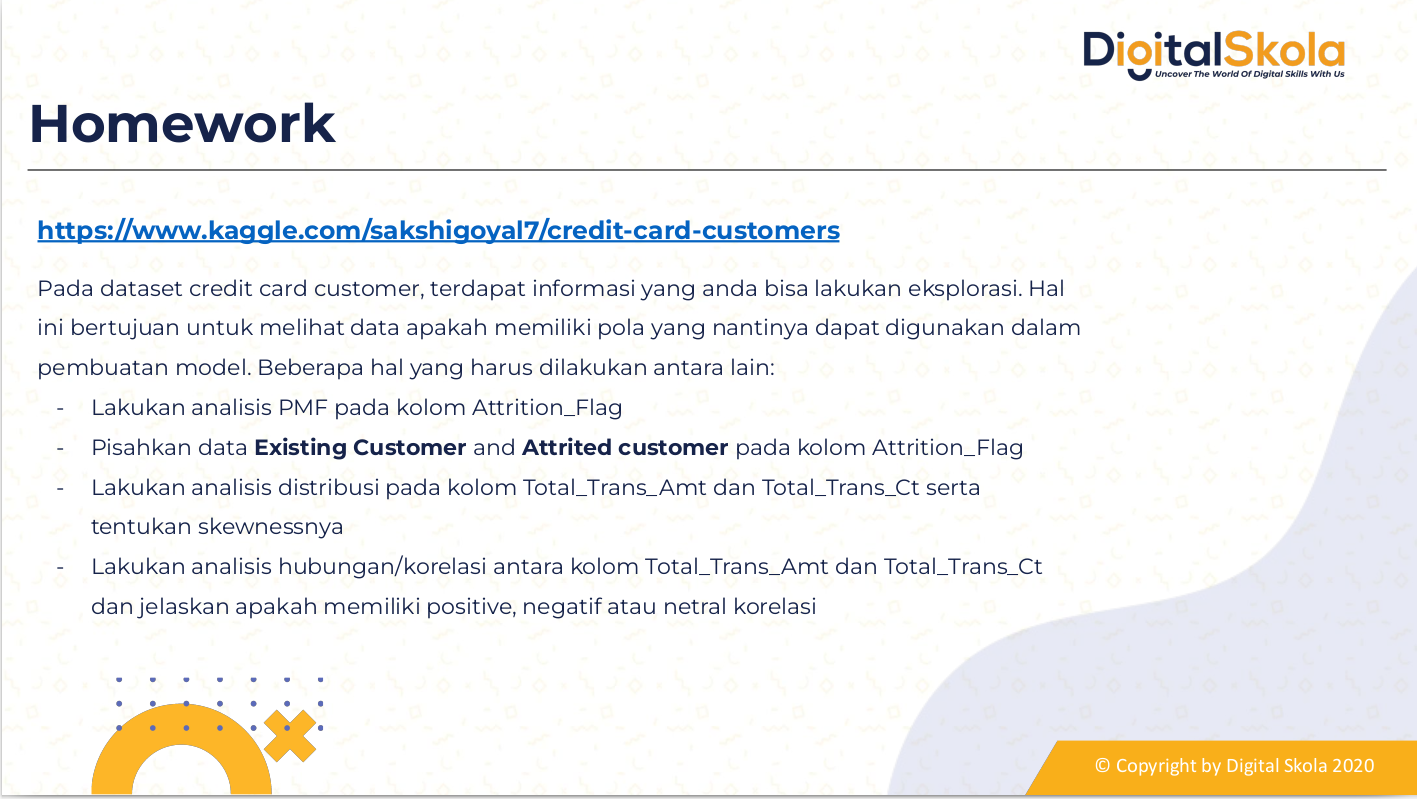

In [ ]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10736 sha256=4f209e5de1177288dce3a6ba889869dd600aa8aa1ec34d9e09b5b3e2cdbb6697
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


In [ ]:
# import library
import pandas as pd
import numpy as np
from empiricaldist import Pmf, Cdf

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
# Download data "BankChurners.csv" di https://www.kaggle.com/sakshigoyal7/credit-card-customers for dataset

# Ini untuk upload dataset dari local ke google colab
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BankChurners.csv to BankChurners.csv
User uploaded file "BankChurners.csv" with length 1510880 bytes


In [ ]:
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# PMF & CDF

In [ ]:
# PMF
Pmf.from_seq(data['Attrition_Flag'], normalize=True)

,probs
Attrited Customer,0.16066
Existing Customer,0.83934


In [ ]:
# CDF
CDF_error = Pmf.from_seq(data['Attrition_Flag'], normalize=True)
CDF_error = pd.DataFrame({'Attrition_Flag':CDF_error.index, "PMF":CDF_error.values})

# Visulization
px.bar(CDF_error, x='Attrition_Flag', y='PMF', width=750, height=550)

# Distribution & Skewness

Skewness Category:
* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
* If the skewness is between -1 and -0.5(negatively or left skewed) or between 0.5 and 1(positively or right skewed), the data are moderately skewed.
* If the skewness is less than -1(negatively or left skewed) or greater than 1(positively or right skewed), the data are highly skewed.

Skewness:  2.0410034025756936


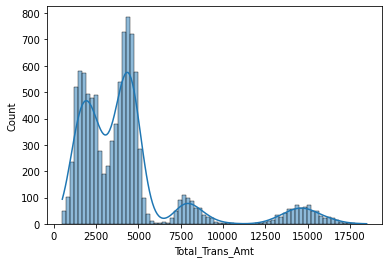

In [ ]:
# Distribution & Skewness Total_Trans_Amt
sns.histplot(data=data, x='Total_Trans_Amt', kde=True)
print("Skewness: ", data['Total_Trans_Amt'].skew())
plt.show()

**Highly Positively or Right Skewed**

Skewness:  0.15367306849872275


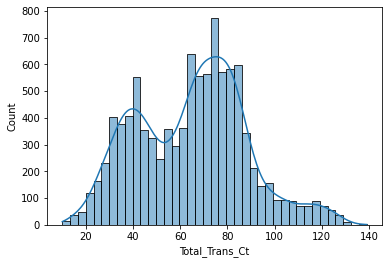

In [ ]:
# Distribution & Skewness Total_Trans_Ct
sns.histplot(data=data, x='Total_Trans_Ct', kde=True)
print("Skewness: ", data['Total_Trans_Ct'].skew())
plt.show()

**Fairly Symetrical**

# Corellation

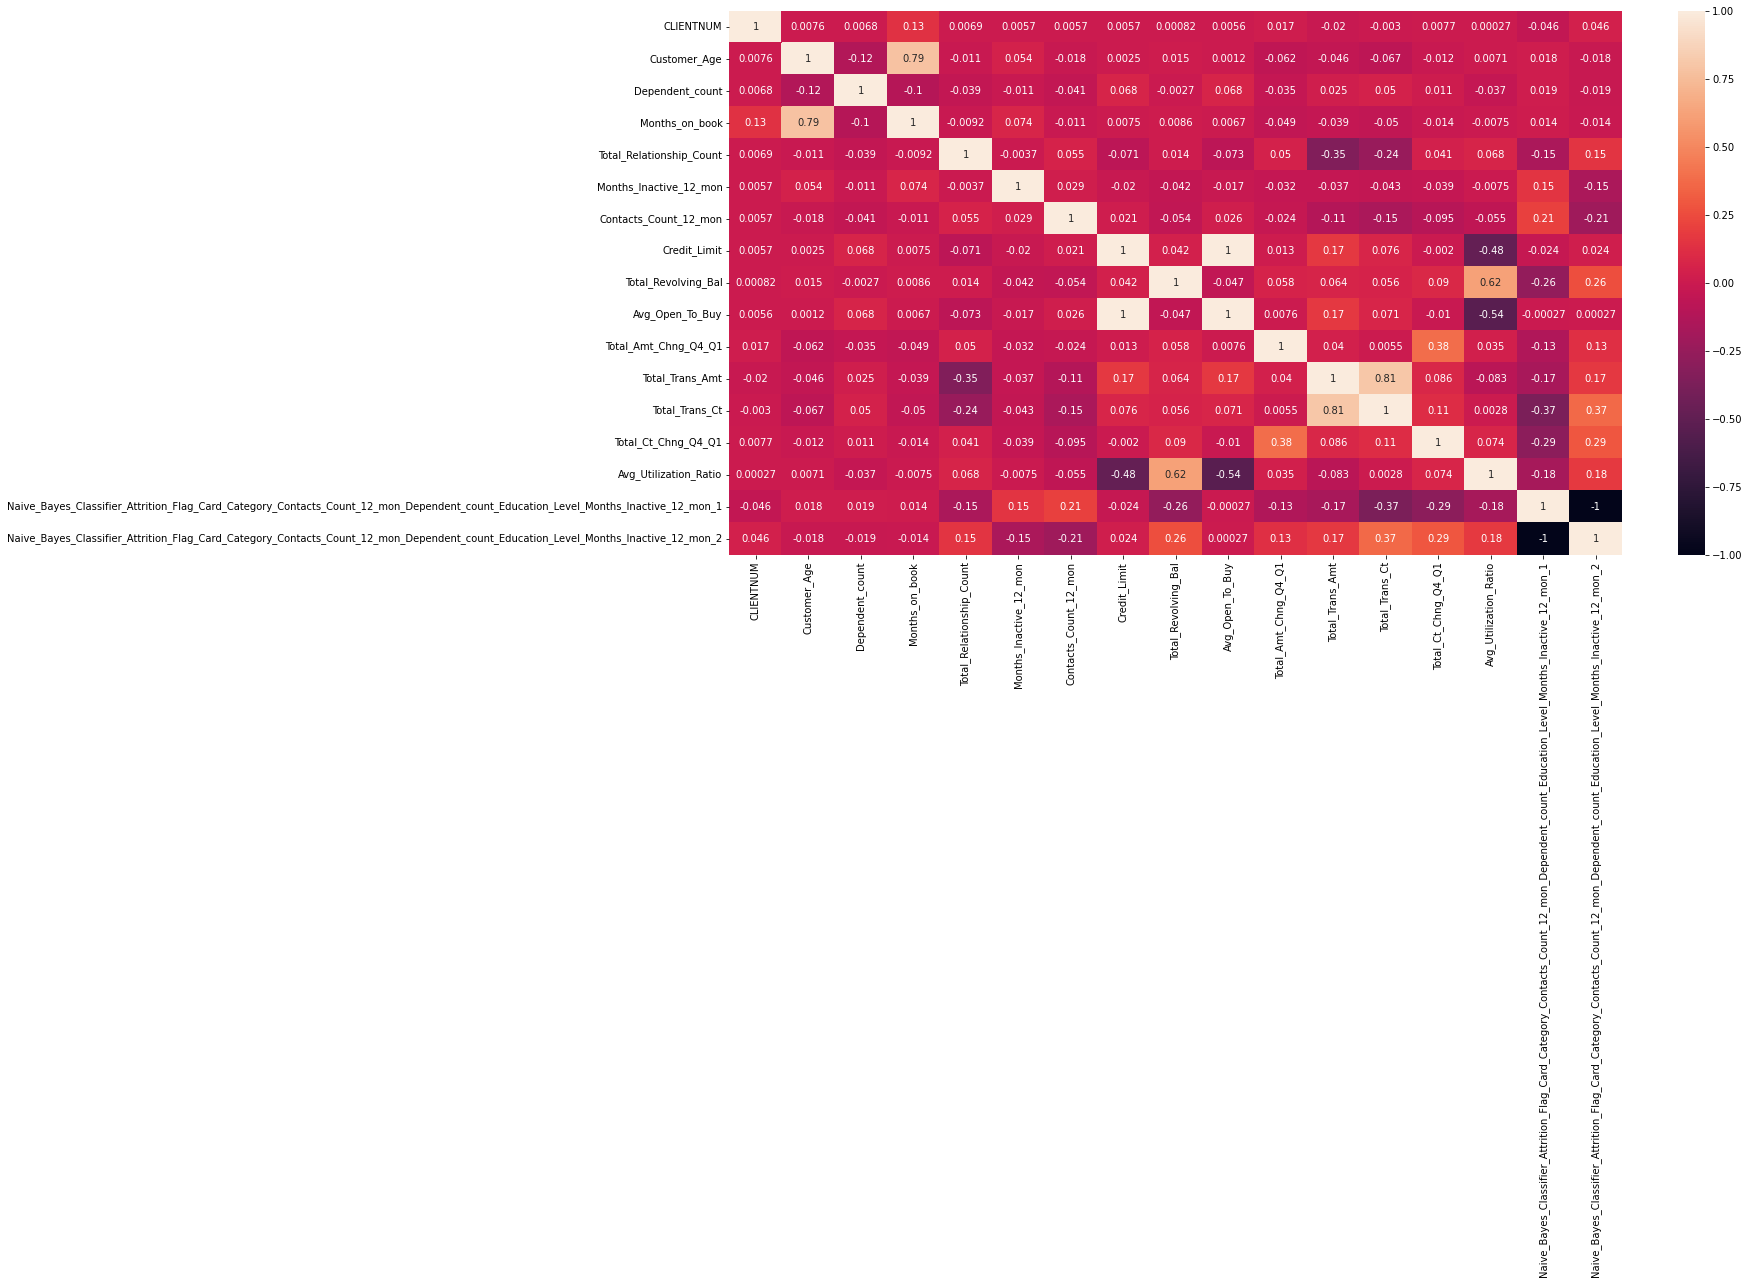

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Hubungan/korelasi dari kolom Total_Trans_Amt dan Total_Trans_Ct adalah positif korelasi (0.81)**